In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [24]:
df = pd.read_csv('seg_rfm.csv') 


In [25]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df[['Recence', 'Frequence', 'Montant']])

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scale)

df['Cluster'] = clusters


/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


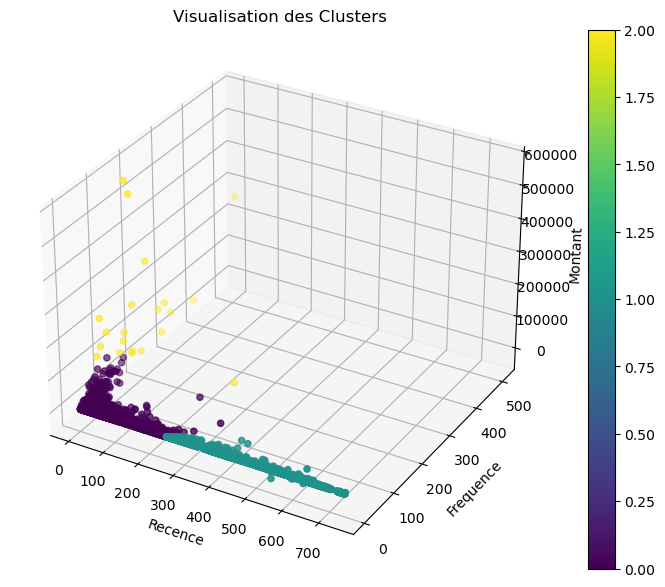

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()
